In [1]:
import pandas as pd
import numpy as np
from io import StringIO
from classes import BalancedUndersamplingShuffle, balanced_sampling
from helpers import plot_learning_curve, plot_validation_curve, fit_and_score_pipeline, exp_range, \
    validation_curve_with_undersampling, plot_validation_curve_with_undersampling, fit_and_score_iteratively
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import ShuffleSplit, StratifiedKFold
from sklearn.metrics import check_scoring
from sklearn.model_selection._validation import _fit_and_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import fbeta_score, make_scorer

In [2]:
from scipy.io import arff

with open('1year.arff','r') as f:
    data1, meta1 = arff.loadarff(f)
    data1 = np.asarray(data1.tolist(), dtype=np.float32)
    print(data1.shape)

with open('2year.arff','r') as f:
    data2, meta2 = arff.loadarff(f)
    data2 = np.asarray(data2.tolist(), dtype=np.float32)
    print(data2.shape)

with open('3year.arff','r') as f:
    data3, meta3 = arff.loadarff(f)
    data3 = np.asarray(data3.tolist(), dtype=np.float32)
    print(data3.shape)

with open('4year.arff','r') as f:
    data4, meta4 = arff.loadarff(f)
    data4 = np.asarray(data4.tolist(), dtype=np.float32)
    print(data4.shape)

with open('5year.arff','r') as f:
    data5, meta5 = arff.loadarff(f)
    data5 = np.asarray(data5.tolist(), dtype=np.float32)
    print(data5.shape)


(7027, 65)
(10173, 65)
(10503, 65)
(9792, 65)
(5910, 65)


In [3]:
data = np.concatenate([data1, data2, data3, data4, data5], axis=0)
data[np.isnan(data)] = 0


# data = data[~np.isnan(data).any(axis=1)]
print(data[:,-1])

print(f'data.shape={data.shape}')

X, y = data[:,:-1], data[:, -1]
# X, y, idx = balanced_sampling(X, y, r = 3, random_state=42)

# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(y.astype(str))

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


print(f'X.shape={X.shape}, y.shape={y.shape}')

[0. 0. 0. ... 1. 1. 1.]
data.shape=(43405, 65)
X.shape=(43405, 64), y.shape=(43405,)


# Try naive fit

In [7]:
# no undersampling
# Baseline model

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=30, random_state=0, max_iter=1000)
res = fit_and_score_iteratively(classifier, X, y, None, 10)


In [8]:
print(res)

[0.94278913 0.04118404 0.10666667 0.02551834 0.50735377]


In [9]:
# Undersampling to a 3:1 ratio
# Baseline model
classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=30, random_state=0, max_iter=1000)
res = fit_and_score_iteratively(classifier, X, y, 3, 10)


a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683
a=0.10662111516202229, r=3, gamma=19.758010521281683


In [10]:
print(res)

[0.66042248 0.35618747 0.36559198 0.37320574 0.56465813]


In [6]:
# Undersampling to a 1:1 ratio
# Baseline model
classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=30, random_state=0, max_iter=1000)
res = fit_and_score_iteratively(classifier, X, y, 1, 10)


a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683


In [7]:
print(res)

[0.57482072 0.56942881 0.58846807 0.5784689  0.57482362]


In [9]:
# normalizing data with pipeline 

classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, 
                           hidden_layer_sizes=30, random_state=0, max_iter=2000)
pipe = make_pipeline(StandardScaler(), classifier)

res = fit_and_score_iteratively(pipe, X, y, 1, 10)
print(res)

a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
[0.7438247  0.74532983 0.74090471 0.75007974 0.74382968]


# Tuning Hyperparameters

In [ ]:
# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

### hidden_layer_sizes

<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<clas

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0,

/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0,

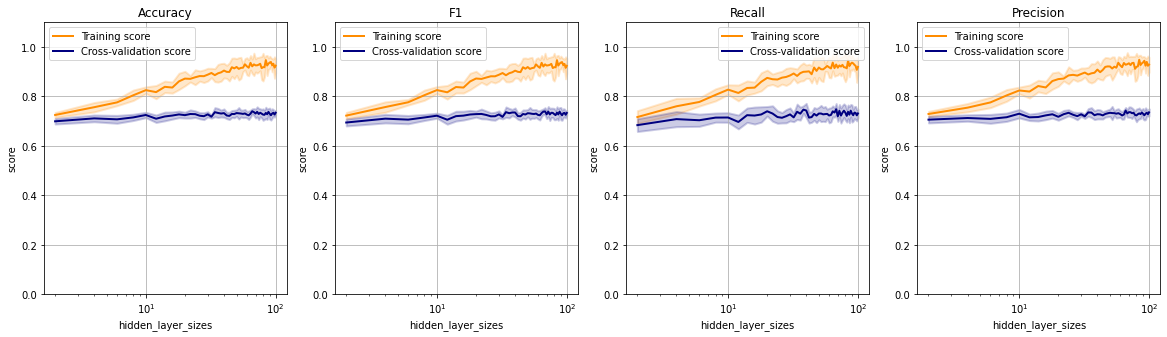

In [10]:
# optimize hidden_layer_sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_range = range(2, 101, 2)
scoring = ['accuracy', 'f1', 'recall', 'precision']

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, max_iter=2000)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='hidden_layer_sizes', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=5, undersampling_ratio=1, is_pipe=True, 
                                                              x_axis_is_log=True)


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0,

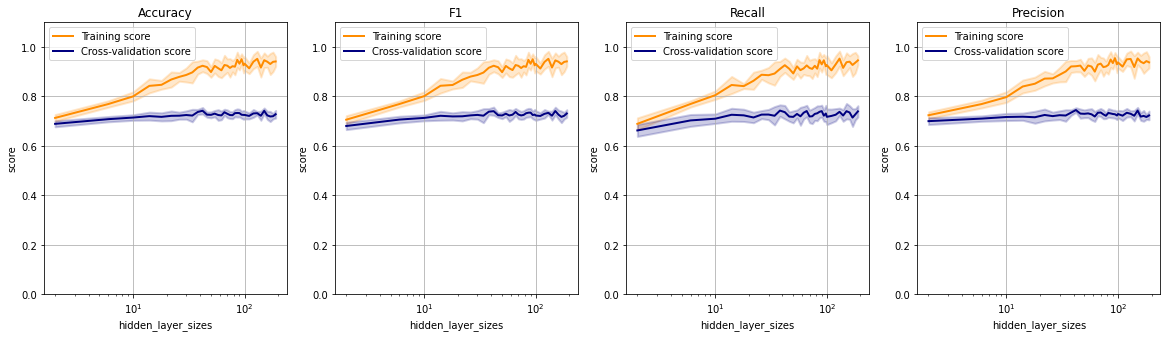

In [11]:
# optimize hidden_layer_sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_range = list(range(2, 100, 4)) + list(range(100, 200, 10))
scoring = ['accuracy', 'f1', 'recall', 'precision']

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, max_iter=3000)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='hidden_layer_sizes', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=5, undersampling_ratio=1, is_pipe=True, 
                                                              x_axis_is_log=True)


In [12]:
results_store

{'fit_time': array([[  2.        ,   1.22891343,   0.25043514],
        [  6.        ,   3.08294787,   0.66600306],
        [ 10.        ,   5.8997761 ,   1.0109449 ],
        [ 14.        ,   8.30425966,   1.95623437],
        [ 18.        ,   7.48260176,   1.21349347],
        [ 22.        ,   7.87944758,   1.65178883],
        [ 26.        ,   7.23668962,   1.94502142],
        [ 30.        ,   7.822807  ,   1.6101497 ],
        [ 34.        ,   8.03279555,   1.73015271],
        [ 38.        ,   9.70688071,   1.04461866],
        [ 42.        ,   9.63787663,   1.07987466],
        [ 46.        ,   8.62356064,   1.89436637],
        [ 50.        ,   7.7243813 ,   2.02966253],
        [ 54.        ,   8.75873835,   2.21305599],
        [ 58.        ,   8.57100062,   1.99850629],
        [ 62.        ,   8.13221326,   1.59196835],
        [ 66.        ,   8.38292711,   1.42467948],
        [ 70.        ,   8.79077508,   2.15165885],
        [ 74.        ,  10.17212982,   2.16083682],


In [17]:
# use 42 as hidden layer size

classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, 
                           hidden_layer_sizes=42, random_state=0, max_iter=2000)
pipe = make_pipeline(StandardScaler(), classifier)

res = fit_and_score_iteratively(pipe, X, y, 1, 10)
print(res)

a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
[0.75211155 0.75381768 0.7478144  0.76028708 0.75211806]


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773


/home/jay/gatech/cs7641/supervised_learning/helpers.py:68: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  scoring


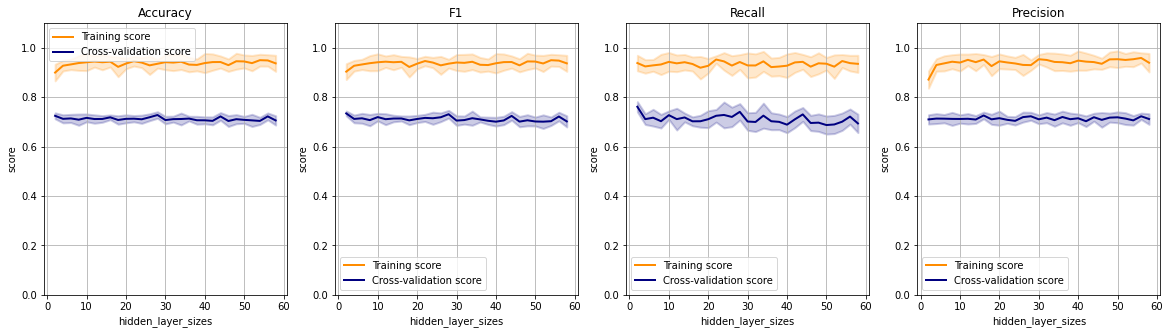

In [13]:
# optimize hidden_layer_sizes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# param_range = range(1, 3)
# param_range = list(range(1, 71, 2)) + list(range(70, 210, 10)) + list(range(200, 500, 20)) + list(range(500, 1000, 50))
param_range = list(range(2, 60, 2)) # + list(range(70, 210, 10)) + list(range(200, 500, 20)) + list(range(500, 1000, 50))
param_range = [(42, p) for p in param_range]
scoring = ['accuracy', 'f1', 'recall', 'precision']

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-4, random_state=0, max_iter=3000)

results_store_2, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='hidden_layer_sizes', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=5, undersampling_ratio=1, is_pipe=True, 
                                                              x_axis_is_log=False, param_range_idx=1)




### regularization alpha

<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
<class 'sklearn.pipeline.Pipeline'>
a=0.0, r=1, gamma=20.040858725761773
a=0.0, r=1, gamma=20.040858725761773
a=0.0,

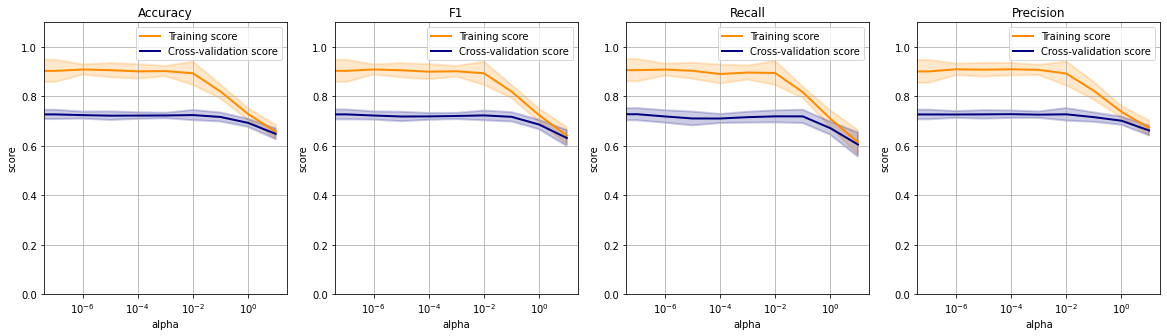

In [21]:
# optimize alpha
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_range = [0, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
scoring = ['accuracy', 'f1', 'recall', 'precision']

cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=0)
classifier = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=42, random_state=0, max_iter=3000)

results_store, plt = plot_validation_curve_with_undersampling(classifier, X_train, y_train, 
                      param_name='alpha', param_range=param_range, fit_params=None, error_score='raise',
                      cv=cv, scoring=scoring, n_jobs=8, iterations=5, undersampling_ratio=1, is_pipe=True, 
                                                              x_axis_is_log=True)


In [22]:
results_store

{'fit_time': array([[0.00000000e+00, 7.66132884e+00, 2.40928760e+00],
        [1.00000000e-07, 7.08878436e+00, 1.48911549e+00],
        [1.00000000e-06, 7.27631872e+00, 1.51477217e+00],
        [1.00000000e-05, 6.25940940e+00, 1.22946408e+00],
        [1.00000000e-04, 6.39659772e+00, 1.09297721e+00],
        [1.00000000e-03, 7.52501016e+00, 1.07548941e+00],
        [1.00000000e-02, 5.77349684e+00, 1.70330248e+00],
        [1.00000000e-01, 3.35305996e+00, 5.58529218e-01],
        [1.00000000e+00, 9.83091640e-01, 3.10786974e-01],
        [1.00000000e+01, 5.44116378e-01, 3.22571192e-01]]),
 'score_time': array([[0.00000000e+00, 5.30278683e-03, 1.40493385e-04],
        [1.00000000e-07, 6.86678886e-03, 5.08413440e-03],
        [1.00000000e-06, 6.82625771e-03, 5.00269064e-03],
        [1.00000000e-05, 5.11548519e-03, 2.32776997e-04],
        [1.00000000e-04, 5.29901981e-03, 3.98269613e-04],
        [1.00000000e-03, 1.37440205e-02, 8.49342846e-03],
        [1.00000000e-02, 5.27613163e-03, 3.1

In [23]:
# use 42 as hidden layer size

classifier = MLPClassifier(solver='adam', activation='relu', alpha=1e-7, 
                           hidden_layer_sizes=42, random_state=0, max_iter=3000)
pipe = make_pipeline(StandardScaler(), classifier)

res = fit_and_score_iteratively(pipe, X, y, 1, 10)
print(res)

a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
a=0.0, r=1, gamma=19.758010521281683
[0.74573705 0.7447285  0.74704991 0.74290271 0.7457348 ]


# Learning Curve

iteration 1
a=0.0, r=1, gamma=20.040858725761773


<module 'matplotlib.pyplot' from '/home/jay/.virtualenv/cs7641-sl/lib/python3.9/site-packages/matplotlib/pyplot.py'>

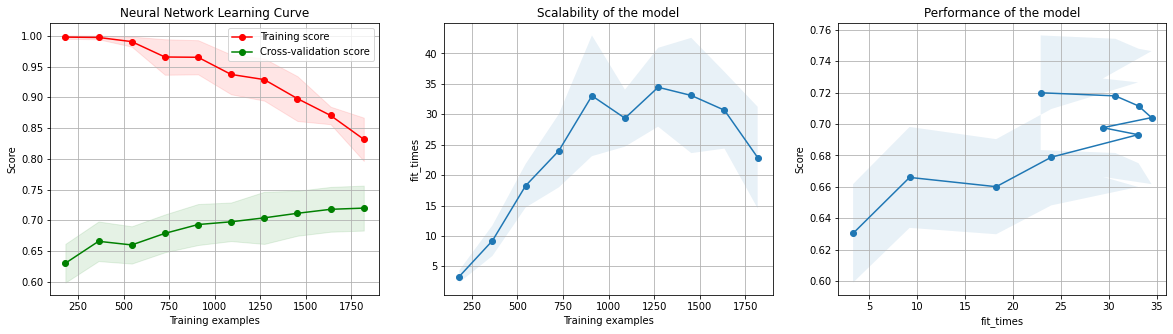

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifier = MLPClassifier(solver='adam', alpha=1e-4, hidden_layer_sizes=42, random_state=42, max_iter=4000, 
                          momentum=1, learning_rate="adaptive")
pipe = make_pipeline(StandardScaler(), classifier)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

title = 'Neural Network Learning Curve'
plot_learning_curve(pipe, title, X_train, y_train, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)




In [ ]:
classifier = MLPClassifier(solver='sgd', alpha=1e-4, hidden_layer_sizes=(30, 15), random_state=0, 
                           learning_rate_init = 0.002, max_iter=2000)
pipe = make_pipeline(StandardScaler(), classifier)
# pipe.fit(X_train, y_train)  # apply scaling on training data
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

title = 'Neural Network Learning Curve'
plot_learning_curve(pipe, title, X, y, axes=None, ylim=None, cv=cv,
                            n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10), scoring='accuracy', iterations=1)